# Context

Mobile phones emit microwaves, and so holding one next to your brain for large parts of the day is a bit like sticking your brain in a microwave oven and pushing the “cook until well done” button. If we wanted to test this experimentally, we could get six groups of people and strap a mobile phone on their heads, then by remote control turn the phones on for a certain amount of time each day [^1]. After six months [^2], we measure the size of any tumour[^3] (in mm<sup>3</sup>) close to the site of the phone antenna (just behind the ear). The six groups experienced 0, 1, 2, 3, 4, or 5 hours per day of phone microwaves for 6 months [^4]. Do tumours significantly increase with greater daily exposure? The data are in `tumour.sav`[^5]. 

[^1]: **The IRB would never approve this.** It would make participants look more foolish than the TOEFL headphone man.
[^2]: 6 month?! The research team must have compensated all participants (maybe a guaranteed tenure).
[^3]: In my work, I use "tumor" instead of "tumour" because I have a personal aversion to `EN-GB` for some reason. 
[^4]: Even patients in a square-cabin hospital receive better treatment than this experiment.
[^5]: I finally realized that this dataset came from Andy Field's statistics textbook. Chester frequently referenced this book during our master’s coursework. This kind of edgy, almost punk-like experiment could only be conceived by a British rock star. 

# Objectives

1. For each group draw a histogram showing the distribution of tumour sizes.
2. Test the hypothesis that the amount of daily exposure to phone microwaves does not affect the size of the tumour. In the meantime, test these two hypotheses using contrasts:
    1. Exposure to phone microwaves does not lead to different mean tumour size. (compare 0 vs. 1 to 5 combined)
    2. The mean tumour size is a linear function of the number of hours per day of phone microwave exposure. (test the linear trend)

    Write a short paragraph to summarize your findings.
3. Compare the means of all pairs of groups using the Tukey HSD test. Briefly summarize your findings.
4. Draw boxplots of tumour sizes against groups. Do you think the plots agree with your findings in the previous two questions?
5. Are any assumptions of ANOVA violated? Do you think what you did in the previous questions was appropriate?

# Solutions

In [1]:
#| echo: false

import pandas as pd
import pyreadstat

tumour_df, tumour_meta = pyreadstat.read_sav('./datasets/tumour.sav')


## Q1: Histogram of tumor sizes

Group 1: 0 hours daily exposure on phone microwave (the control group); 

Group 2-6: 1 hour - 5 hours of daily exposure on phone microwave. 

Examination of a histogram shown in @fig-histo-tumour-grid of tumor sizes indicate that the scores were approximately normally distributed with no extreme outliers.

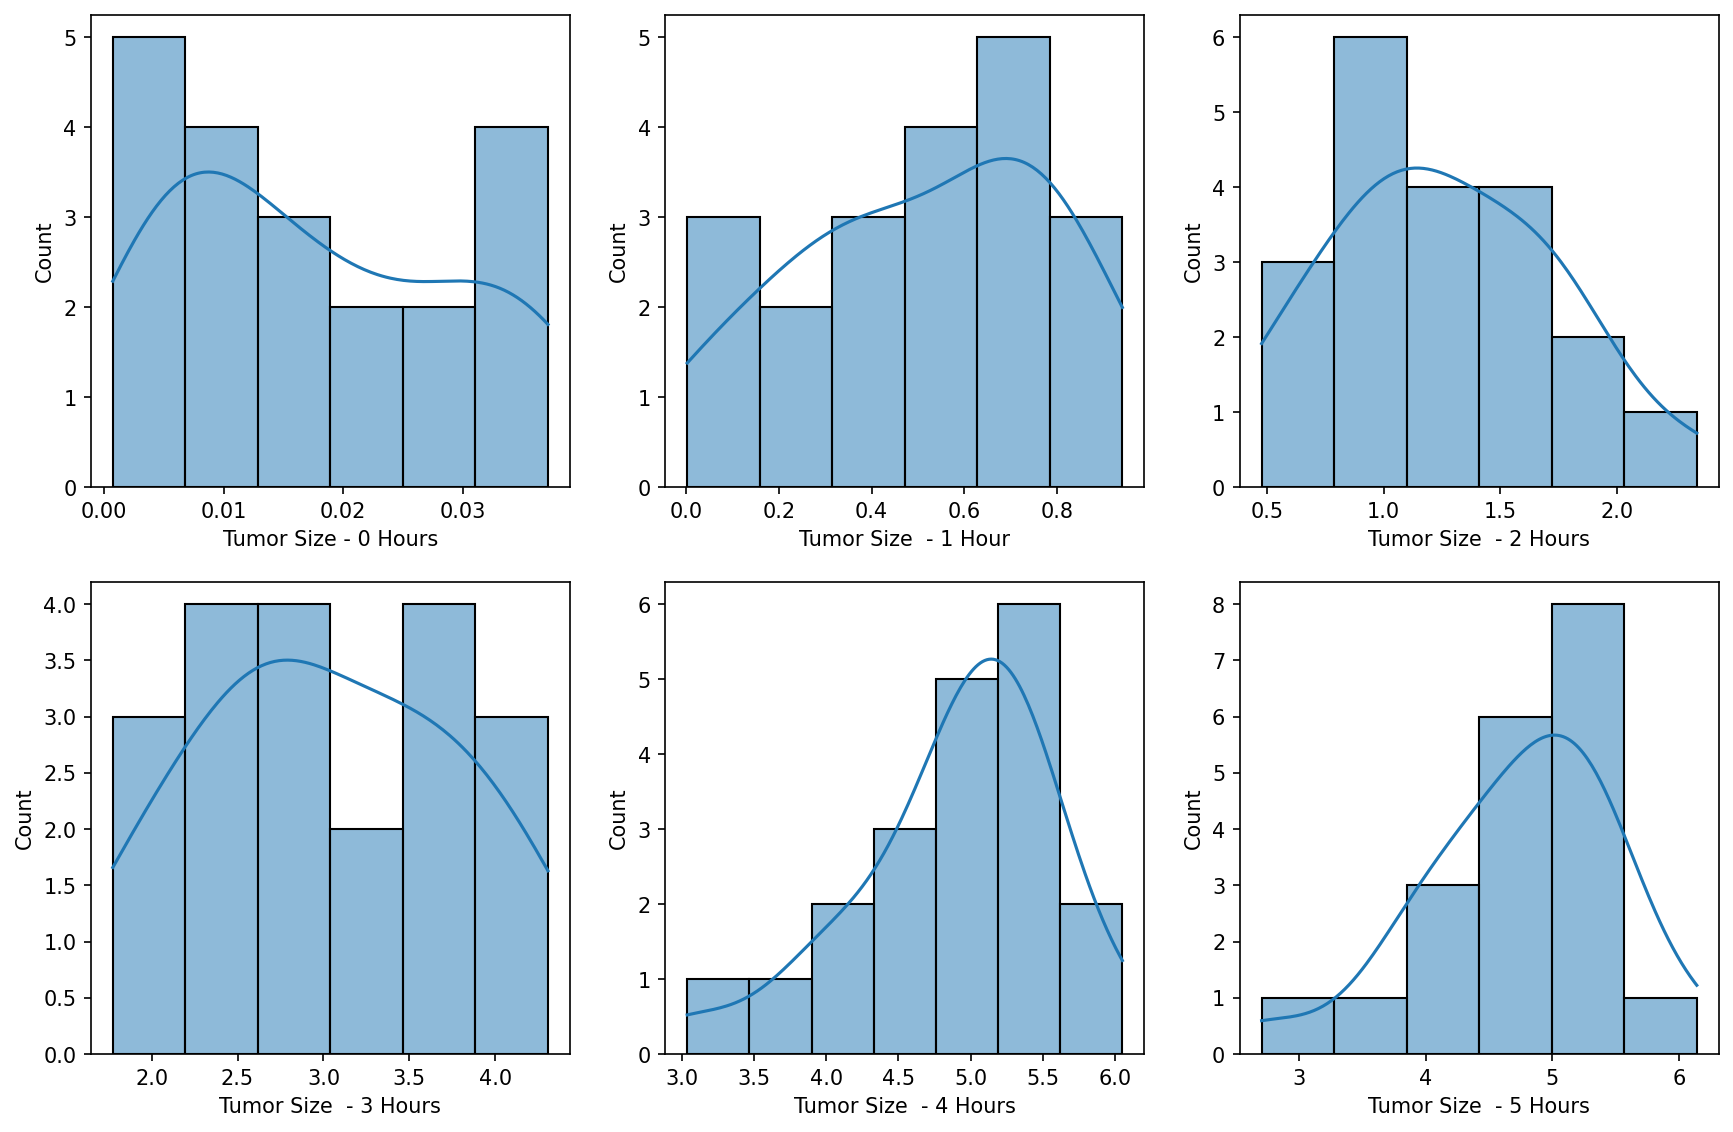

In [4]:
#| echo: false
#| label: fig-histo-tumour-grid
#| fig-cap: Distribution of tumour sizes per group. 

import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns


tumour_df, tumour_meta = pyreadstat.read_sav('./datasets/tumour.sav')

fig, ax = plt.subplots(2,3)
sns.histplot(tumour_df[tumour_df['usage'] == 1], x='tumour', kde=True, ax=ax[0, 0]).set_xlabel('Tumor Size - 0 Hours')
sns.histplot(tumour_df[tumour_df['usage'] == 2], x='tumour', kde=True, ax=ax[0, 1]).set_xlabel('Tumor Size  - 1 Hour')
sns.histplot(tumour_df[tumour_df['usage'] == 3], x='tumour', kde=True, ax=ax[0, 2]).set_xlabel('Tumor Size  - 2 Hours')
sns.histplot(tumour_df[tumour_df['usage'] == 4], x='tumour', kde=True, ax=ax[1, 0]).set_xlabel('Tumor Size  - 3 Hours')
sns.histplot(tumour_df[tumour_df['usage'] == 5], x='tumour', kde=True, ax=ax[1, 1]).set_xlabel('Tumor Size  - 4 Hours')
sns.histplot(tumour_df[tumour_df['usage'] == 6], x='tumour', kde=True, ax=ax[1, 2]).set_xlabel('Tumor Size  - 5 Hours')
fig.set_size_inches(14, 9)
fig.set_dpi(150)

plt.show()


## Q2: Hypothesis tested with a priori comparisons

Unfortunately there's no straightforward way for the planned contrast within all modules in Python. This part I will switch to R.  

### Q2a: the overall ANOVA result

**Given:** 

$H_0$: The amount of daily exposure to phone microwaves does not affect the size of the tumor.

**Result:** 

The one-way ANOVA test (@tbl-anova) shows a significant effect with $F(5, \ 114) = 269.73$, $p < 0.001$. However, the result of Levene’s test (see @tbl-levene) suggested that the assumption of homogeneity of variance has been violated with $F(5,\ 114) = 10.2453$, $p < 0.001$, thus we should seek for Welch ANOVA for a more robust result. The Welch $F$ result (@tbl-welch-f) showed that using mobile phone significantly affected the size of brain tumor size $F(5,\ 44.39) = 414.93$, $p < 0.001$, indicating that exposure does affect tumor size. The null hypothesis ($H_0$) was therefore rejected. 


In [5]:
#| echo: false
#| label: tbl-levene
#| tbl-cap: "Levene Test of Homogeneity of Variances"

import pingouin as pg

# Test of Homogeneity of Variances
tumour_levene = pg.homoscedasticity(data = tumour_df, dv='tumour', group='usage', center='mean')
Markdown(tumour_levene.to_markdown(index=False))

|       W |        pval | equal_var   |
|--------:|------------:|:------------|
| 10.2453 | 3.97382e-08 | False       |

In [6]:
#| echo: false
#| label: tbl-anova
#| tbl-cap: "One-way ANOVA"
# One-way ANOVA
tumour_anova = pg.anova(data = tumour_df, dv='tumour', between='usage', detailed=True)
Markdown(tumour_anova.to_markdown(index=False))

| Source   |       SS |   DF |        MS |       F |         p-unc |       np2 |
|:---------|---------:|-----:|----------:|--------:|--------------:|----------:|
| usage    | 450.664  |    5 | 90.1328   | 269.733 |   2.00779e-61 |   0.92206 |
| Within   |  38.0938 |  114 |  0.334156 | nan     | nan           | nan       |

In [7]:
#| echo: false
#| label: tbl-welch-f
#| tbl-cap: "Welch ANOVA"
# Robust Tests of Equality of Means
tumour_welchF = pg.welch_anova(data = tumour_df, dv='tumour', between='usage')
Markdown(tumour_welchF.to_markdown(index=False))

| Source   |   ddof1 |   ddof2 |       F |       p-unc |     np2 |
|:---------|--------:|--------:|--------:|------------:|--------:|
| usage    |       5 | 44.3903 | 414.926 | 4.52854e-36 | 0.92206 |

### Q2b: comparing 0 hours vs. 1 to 5 hours combined

**Given:**

To conduct an a priori comparisons for 0 hours vs. 1 to 5 hours combined, the null hypothesis $H_0$ would be: 

$H_0: \mu_1 - \frac{\mu_2 + \mu_3 + \mu_4 + \mu_5 + \mu_6}{5} = 0$

The contrast coefficients should be $(+5, -1, -1, -1, -1, -1)$.

**Result:**

Planned contrast comparing the mean of Group 1, no exposure to the microwave, with the combined means of Groups 2–6, the microwave intervention groups was performed. This contrast was tested using $\alpha = 0.05$, two tailed. For this contrast, $t(114) = -20.24$, $𝑝 < 0.001$, two tailed (or $t(75.37) = -45.22$, $𝑝 < 0.001$ if equal variance not assumed). The mean the tumor size for the control group ($M = 0.02$) was significantly lower than the mean tumor size for the five combined intervention groups ($M = 2.41$).


### Q2c: the linear trend

**Given:**

To test whether the scores increase linearly, contrast coefficients should be $(-5, -3, -1, +1, +3, +5)$

**Result**

In contrast 2, a significant linear trend was shown with $t(114) = 35.55$, $p < 0.001$, two-tailed (or $t(33.70) = 37.34$, $p < 0.001$ if equal variance not assumed), indicating that tumor size increases linearly with more hours of exposure.

```
 contrast estimate    SE  df t.ratio p.value
 0 vs 1-5    -14.3 0.708 114 -20.239  <.0001
 linear       38.4 1.080 114  35.549  <.0001
```

## Q3: Post hoc tests

### Q3a: The standard Tukey HSD

On the Levene’s test we have $F(5,\ 114) = 10.2453$, $p < 0.001$. There's already a violation of the homogeneity of variances assumption. Should I do this? 

**Results:**

All possible pairwise comparisons were made using the Tukey HSD (as listed in @tbl-hsd). On $\alpha = 0.05$, significant differences were found between most pairs of groups. The tumor sizes for 0 hours differ significantly from all other exposure groups except the group of 1 hour ($p = 0.0790$). While tumor sizes for 1 hour differ significantly from 2 hours and higher. No significant difference between 4 and 5 hours ($p = 0.9551$). Overall, tumor size increases with more exposure.

In [8]:
#| echo: false
#| label: tbl-hsd
#| tbl-cap: "Pairwise comparisons with Tukey HSD "
# Tukey HSD Test
tumour_hsd = pg.pairwise_tukey(data=tumour_df, dv='tumour', between='usage')
Markdown(tumour_hsd.to_markdown(index=False))

|   A |   B |   mean(A) |   mean(B) |      diff |       se |          T |     p-tukey |    hedges |
|----:|----:|----------:|----------:|----------:|---------:|-----------:|------------:|----------:|
|   1 |   2 |  0.01755  |  0.514886 | -0.497336 | 0.182799 |  -2.72067  | 0.078988    | -2.4235   |
|   1 |   3 |  0.01755  |  1.26136  | -1.24381  | 0.182799 |  -6.80425  | 7.42325e-09 | -3.50189  |
|   1 |   4 |  0.01755  |  3.02159  | -3.00404  | 0.182799 | -16.4336   | 2.26485e-14 | -5.43844  |
|   1 |   5 |  0.01755  |  4.8878   | -4.87025  | 0.182799 | -26.6426   | 2.26485e-14 | -9.6943   |
|   1 |   6 |  0.01755  |  4.73059  | -4.71304  | 0.182799 | -25.7826   | 2.26485e-14 | -8.357    |
|   2 |   3 |  0.514886 |  1.26136  | -0.746476 | 0.182799 |  -4.08359  | 0.00114113  | -1.82059  |
|   2 |   4 |  0.514886 |  3.02159  | -2.50671  | 0.182799 | -13.7129   | 2.26485e-14 | -4.25493  |
|   2 |   5 |  0.514886 |  4.8878   | -4.37291  | 0.182799 | -23.9219   | 2.26485e-14 | -8.0601   |
|   2 |   6 |  0.514886 |  4.73059  | -4.21571  | 0.182799 | -23.0619   | 2.26485e-14 | -7.02603  |
|   3 |   4 |  1.26136  |  3.02159  | -1.76023  | 0.182799 |  -9.62931  | 2.58682e-14 | -2.68085  |
|   3 |   5 |  1.26136  |  4.8878   | -3.62643  | 0.182799 | -19.8383   | 2.26485e-14 | -5.89535  |
|   3 |   6 |  1.26136  |  4.73059  | -3.46923  | 0.182799 | -18.9784   | 2.26485e-14 | -5.20611  |
|   4 |   5 |  3.02159  |  4.8878   | -1.8662   | 0.182799 | -10.209    | 2.27596e-14 | -2.49974  |
|   4 |   6 |  3.02159  |  4.73059  | -1.709    | 0.182799 |  -9.34905  | 3.64153e-14 | -2.16517  |
|   5 |   6 |  4.8878   |  4.73059  |  0.157201 | 0.182799 |   0.859967 | 0.955111    |  0.208165 |

### Q3b: Games-Howell

Given the equal variance assumption is violated and the Welch ANOVA was tested instead of the classic one-way ANOVA in the former section, the Games-Howell test seems to be much more optimal than HSD as it is much more robust to the heterogeneity of variances. 

**Results:**

Games–Howell test revealed significant differences between all groups ($p < 0.001$, as shown in @tbl-gameshowell) for all groups except	between	4 and 5 hours (group 5 and 6).

In [9]:
#| echo: false
#| label: tbl-gameshowell
#| tbl-cap: "Pairwise comparisons with Games-Howell"
# Games-Howell
tumour_gameshowell = pg.pairwise_gameshowell(data=tumour_df, dv='tumour', between='usage')
Markdown(tumour_gameshowell.to_markdown(index=False))

|   A |   B |   mean(A) |   mean(B) |      diff |        se |         T |      df |        pval |    hedges |
|----:|----:|----------:|----------:|----------:|----------:|----------:|--------:|------------:|----------:|
|   1 |   2 |  0.01755  |  0.514886 | -0.497336 | 0.0636051 |  -7.81912 | 19.0692 | 3.05245e-06 | -2.4235   |
|   1 |   3 |  0.01755  |  1.26136  | -1.24381  | 0.110087  | -11.2984  | 19.0231 | 9.62253e-09 | -3.50189  |
|   1 |   4 |  0.01755  |  3.02159  | -3.00404  | 0.171205  | -17.5465  | 19.0095 | 4.67837e-12 | -5.43844  |
|   1 |   5 |  0.01755  |  4.8878   | -4.87025  | 0.155711  | -31.2775  | 19.0115 | 7.77156e-16 | -9.6943   |
|   1 |   6 |  0.01755  |  4.73059  | -4.71304  | 0.174798  | -26.9628  | 19.0091 | 1.9984e-15  | -8.357    |
|   2 |   3 |  0.514886 |  1.26136  | -0.746476 | 0.127083  |  -5.87392 | 30.4022 | 2.6158e-05  | -1.82059  |
|   2 |   4 |  0.514886 |  3.02159  | -2.50671  | 0.182598  | -13.728   | 24.1391 | 9.6545e-12  | -4.25493  |
|   2 |   5 |  0.514886 |  4.8878   | -4.37291  | 0.168157  | -26.0049  | 25.16   | 0           | -8.0601   |
|   2 |   6 |  0.514886 |  4.73059  | -4.21571  | 0.185971  | -22.6686  | 23.9373 | 0           | -7.02603  |
|   3 |   4 |  1.26136  |  3.02159  | -1.76023  | 0.203508  |  -8.64943 | 32.4145 | 9.08664e-09 | -2.68085  |
|   3 |   5 |  1.26136  |  4.8878   | -3.62643  | 0.190658  | -19.0206  | 34.1944 | 0           | -5.89535  |
|   3 |   6 |  1.26136  |  4.73059  | -3.46923  | 0.20654   | -16.7969  | 32.0201 | 3.88578e-15 | -5.20611  |
|   4 |   5 |  3.02159  |  4.8878   | -1.8662   | 0.231392  |  -8.0651  | 37.6629 | 1.46334e-08 | -2.49974  |
|   4 |   6 |  3.02159  |  4.73059  | -1.709    | 0.244644  |  -6.98566 | 37.9836 | 3.73845e-07 | -2.16517  |
|   5 |   6 |  4.8878   |  4.73059  |  0.157201 | 0.234063  |   0.67162 | 37.5028 | 0.984024    |  0.208165 |

## Q4: The box-plot

The boxplot is shown as @fig-boxplot, which visually supports the findings above, showing a significant and linear increase in tumor size with more mobile phone usage, while also highlighting the variance issue across groups.

- **Increasing Median**: The boxplot shows a increase in median tumor size with more mobile phone usage, which aligns with the statistical analysis.
- **Spread and Outliers**: The spread of data increases with more exposure, and there are a few outliers, particularly in the 5-hour group.
- **Plateau**: The increase in tumor size appears to plateau between 4 and 5 hours, which reflects the Tukey HSD results on showing no significant difference between these groups.

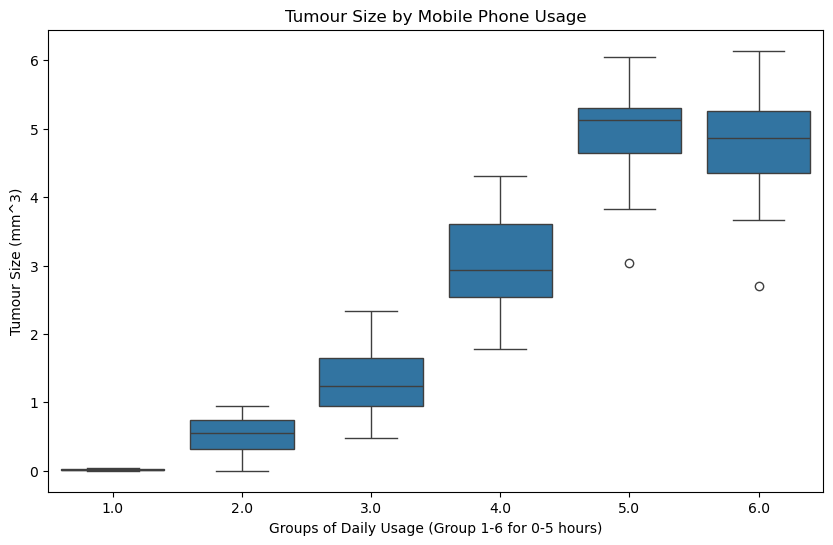

In [10]:
#| echo: false
#| fig-cap: Boxplots for tumour size by groups of mobile phone usage
#| label: fig-boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='usage', y='tumour', data=tumour_df)
plt.title('Tumour Size by Mobile Phone Usage')
plt.xlabel('Groups of Daily Usage (Group 1-6 for 0-5 hours)')
plt.ylabel('Tumour Size (mm^3)')
plt.show()

## Q5: Assumptions of ANOVA

As the Levene’s test is significant ($p < 0.001$), indicating a violation of the assumption on equal variances. Thus, both the standard one-way ANOVA and Tukey HSD test, which assumes equal variances, might not be the most appropriate choice. Although the large sample sizes in each group ($n = 20$) might help mitigate this issue. The results should be interpreted with caution, and alternative methods (in this lab work the Welch ANOVA and Games-Howell Test was selected) could be considered for more robustness.

# Final thoughts: Strap, phone, and head

Based on my personal knowledge, I’ve only encountered a scenario where a person has a device strapped to their body, controlled remotely to turn it on and off - typically seen in certain kind of motion pictures, often stored in a hidden folder labeled `learning-materials` or `学习资料`.

However, it's important to recall that this dataset originates from 2003, a time when people were still grappling with functional phones featuring keypads and smaller screens [^6]. This context might have made participants appear less foolish, but the phone behind their ear still resembled a large tumor.

[^6]: But many interestingly designed phones emerged in 2003, like the Siemens SX1 and the original Nokia N-Gage. Those were the good old days!

I attempted the strap-phone-on-head concept on an ordinary Thursday, as shown in @fig-treatment below. It felt okay, but I definitely wouldn’t walk out of the office with the phone on my head.

![An attempt. Shot on Thursday.](./treatment.jpg){#fig-treatment height=30em}

**Trust me, nobody would like to do this for six months.**

Yet, think about the Bluetooth technology, which operates at around 2.4 GHz — similar to LTE networks and our beloved microwave ovens. Given that almost all TWS earbuds use Bluetooth, people today are essentially repeating the treatment from this experiment over and over.

Alright, maybe I was wrong. People are indeed willing to put microwave devices on their heads.

Or perhaps the real "tumor" 20 years later is, in fact, the earbuds.